# Task 1: Feed-forward neural networks


---

Tutorial: "Machine Learning in Solid Mechanics @ Cyber-Physical Simulation, TU Darmstadt

Lecturer: Prof. Oliver Weeger

Assistants: Dominik K. Klein, Jasper O. Schommartz

Winter term 2024 / 2025


---





*Run the following cell to clone the GitHub repository in your current Google Colab environment.*

In [10]:
!git clone https://github.com/CPShub/TutorialMLinSolidMechanics.git

Cloning into 'TutorialMLinSolidMechanics'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 204 (delta 27), reused 56 (delta 14), pack-reused 128 (from 1)
Receiving objects: 100% (204/204), 6.59 MiB | 12.50 MiB/s, done.
Resolving deltas: 100% (31/31), done.


*Run the following cell to import all modules and python files to this notebook. If you made changes in the python files, run the following cell again to update the python files in this notebook. You might need to restart your Colab session first ("Runtime / Restart session" in the header menu).*

In [11]:
from matplotlib import pyplot as plt
import tensorflow as tf
import datetime
now = datetime.datetime.now

# %% Own modules
import TutorialMLinSolidMechanics.Winter_term_24_25.FFNN_introduction.data as ld
import TutorialMLinSolidMechanics.Winter_term_24_25.FFNN_introduction.models as lm

*If you want to clone the repository again, you have to delete it from your Google Colab files first. For this, you can run the following cell.*

In [9]:
%rm -rf TutorialMLinSolidMechanics

### Load data and model

In [14]:
model = lm.main()

xs, ys, xs_c, ys_c = ld.bathtub()

### Model calibration

2024-10-21 15:18:30.854956
Epoch 1/15
11/11 - 0s - 5ms/step - loss: 0.0536
Epoch 2/15
11/11 - 0s - 5ms/step - loss: 0.0554
Epoch 3/15
11/11 - 0s - 5ms/step - loss: 0.0532
Epoch 4/15
11/11 - 0s - 6ms/step - loss: 0.0533
Epoch 5/15
11/11 - 0s - 12ms/step - loss: 0.0534
Epoch 6/15
11/11 - 0s - 6ms/step - loss: 0.0544
Epoch 7/15
11/11 - 0s - 6ms/step - loss: 0.0544
Epoch 8/15
11/11 - 0s - 12ms/step - loss: 0.0544
Epoch 9/15
11/11 - 0s - 6ms/step - loss: 0.0534
Epoch 10/15
11/11 - 0s - 12ms/step - loss: 0.0531
Epoch 11/15
11/11 - 0s - 5ms/step - loss: 0.0539
Epoch 12/15
11/11 - 0s - 5ms/step - loss: 0.0545
Epoch 13/15
11/11 - 0s - 13ms/step - loss: 0.0557
Epoch 14/15
11/11 - 0s - 12ms/step - loss: 0.0572
Epoch 15/15
11/11 - 0s - 6ms/step - loss: 0.0524
it took 0:00:01.465200 (sec) to calibrate the model


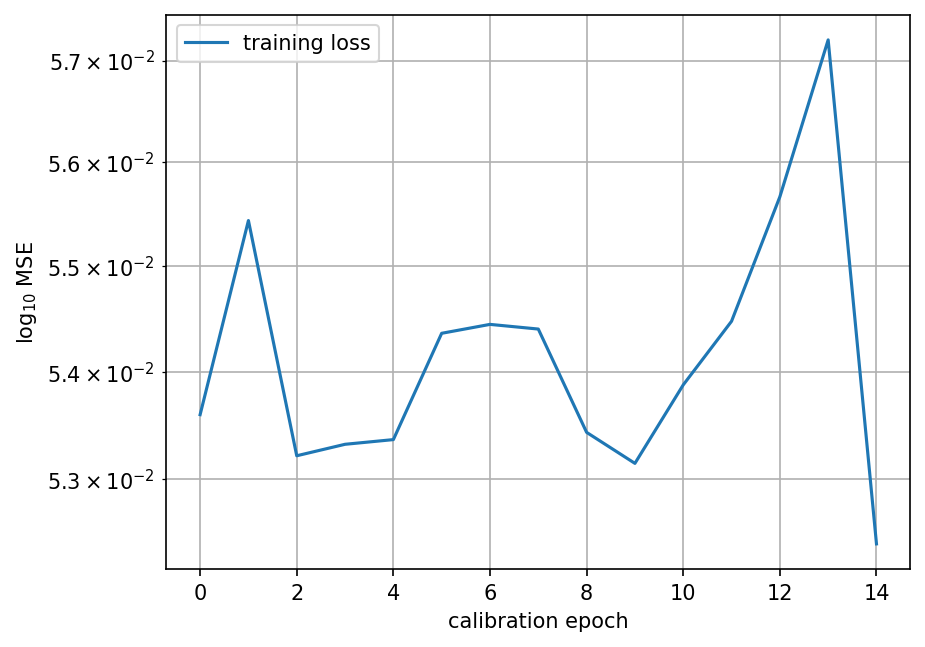

In [19]:
t1 = now()
print(t1)

model.optimizer.learning_rate.assign(0.002)
h = model.fit([xs_c], [ys_c], epochs = 15,  verbose = 2)

t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')

# plot some results
plt.figure(1, dpi=150)
plt.semilogy(h.history['loss'], label='training loss')
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('log$_{10}$ MSE')
plt.legend()


### Model evaluation

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


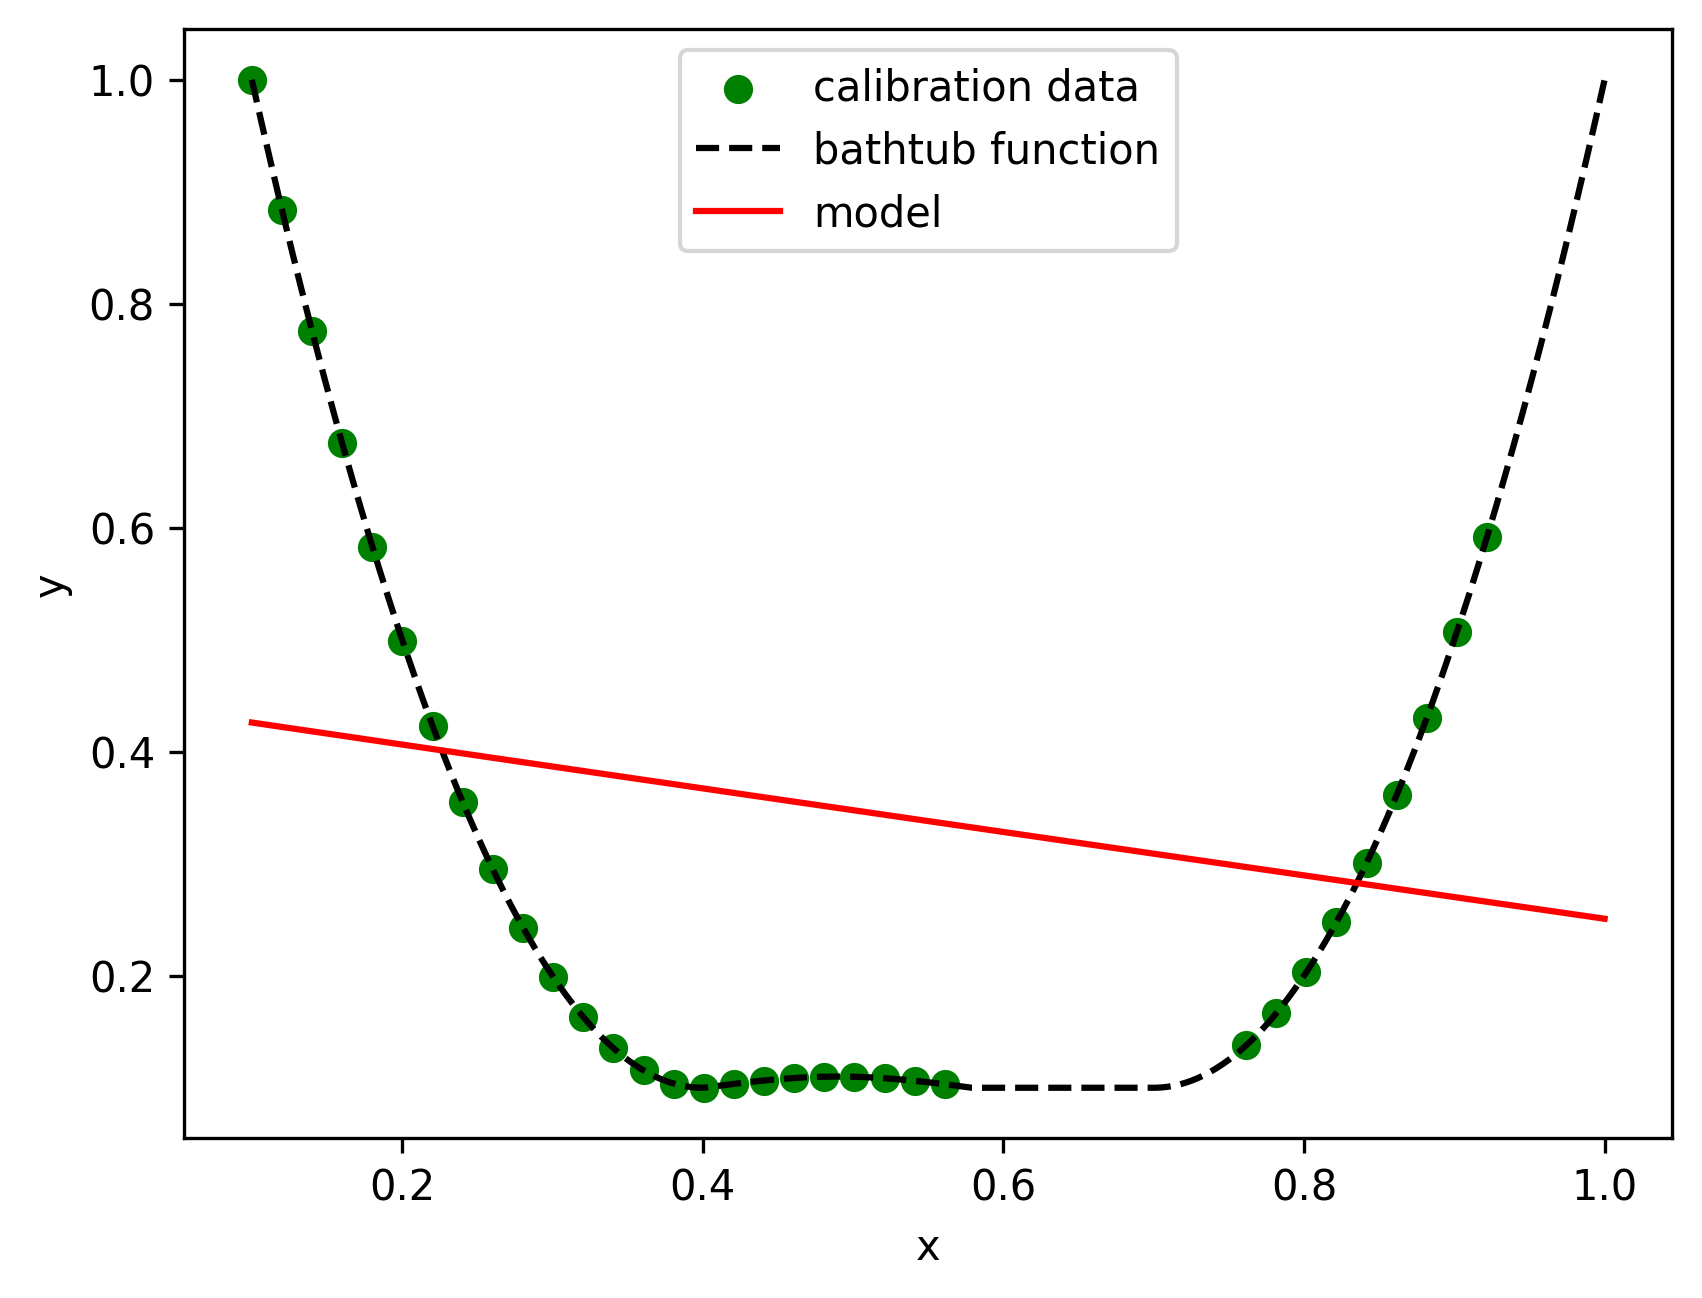

In [21]:
plt.figure(2, dpi=300)
plt.scatter(xs_c[::10], ys_c[::10], c='green', label = 'calibration data')
plt.plot(xs, ys, c='black', linestyle='--', label='bathtub function')
plt.plot(xs, model.predict(xs), label='model', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()